### Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
%matplotlib inline

In [2]:
startups=pd.read_csv('50_Startups.csv')

In [3]:
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


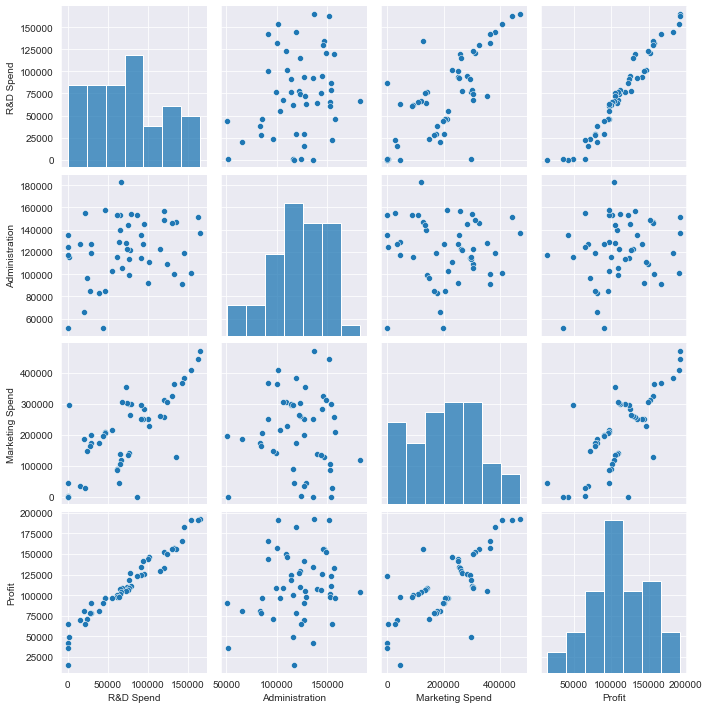

In [6]:
#scatter plot help us to find the relaton between 2 variables and give idea about R^2.

sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [7]:
data1=startups.rename({'R&D Spend' : 'RD'},axis=1)
data1=data1.rename({'Marketing Spend':'MS'},axis=1)

In [8]:
data1

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
data1.describe()

,RD,Administration,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
data1.corr()

,RD,Administration,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [11]:
#Preparing a model for getting  better prediction of profit 
import statsmodels.formula.api as smf

model=smf.ols('Profit~RD+Administration+MS+State',data=data1).fit()

In [12]:
model.summary() # here we got R square is >0.85 hence the model have strong relation no need for modification.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           1.34e-27
Time:                        12:11:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD                    0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                    0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
(model.pvalues) # p values is greater than alpha so this data set is perfect.

Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RD                   2.578772e-21
Administration       6.077373e-01
MS                   1.226769e-01
dtype: float64

In [14]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [17]:
data2=smf.ols('Profit~RD',data=data1).fit()

In [18]:
data2

In [19]:
print(data2.tvalues, data2.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [21]:
data2=smf.ols('Profit~MS',data=data1).fit()

In [22]:
print(data2.tvalues,data2.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [ ]:
data2=smf.ols('Profit~Administration',data=data2).fit()

In [23]:
data2

ERROR! Session/line number was not unique in database. History logging moved to new session 154


In [24]:
print(data2.tvalues,data2.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [25]:
rsqR_D=smf.ols('RD ~ Administration+MS',data=data1).fit()
reqAdministration=smf.ols('Administration~RD+MS',data=data1).fit()
reqMS=smf.ols('MS~Administration+RD',data=data1).fit()

In [26]:
R=(rsqR_D.rsquared)
S=(reqAdministration.rsquared)
T=(reqMS.rsquared)

In [27]:
model_RD=smf.ols('Profit~RD',data=data1).fit()

In [28]:
(model_RD.rsquared)

0.9465353160804392

In [29]:
model_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           3.50e-32
Time:                        12:16:55   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model_AD=smf.ols('Profit~Administration',data=data1).fit()

In [31]:
model_AD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 04 Sep 2021   Prob (F-statistic):              0.162
Time:                        12:17:10   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model_MS=smf.ols('Profit~MS',data=data1).fit()

In [33]:
model_MS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           4.38e-10
Time:                        12:18:25   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
S

0.14900208239517554

In [35]:
T

0.5702202685282503

In [36]:
vif_RD=1/(1-R)
vifAdmin=1/(1-S)
vifMS=1/(1-T)

In [37]:
print(vif_RD,vifAdmin,vifMS)

2.4689030699947017 1.1750910070550458 2.3267732905308773


In [38]:
# sorting VIF value in data frame

d1={'Variabels':['RD','Administration','MS'],'VIF':[vif_RD,vifAdmin,vifMS]}

In [39]:
d1

{'Variabels': ['RD', 'Administration', 'MS'],
 'VIF': [2.4689030699947017, 1.1750910070550458, 2.3267732905308773]}

In [40]:
VIF_Frame=pd.DataFrame(d1)
VIF_Frame

,Variabels,VIF
0,RD,2.468903
1,Administration,1.175091
2,MS,2.326773


In [41]:
import statsmodels.api as sm

In [42]:
#finding residuals
res=model.resid

In [43]:
res

0      -128.741364
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193818
5     -6482.687120
6     -1976.782788
7     -4403.044650
8       577.026673
9     -5069.702528
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761169
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396604
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518952
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

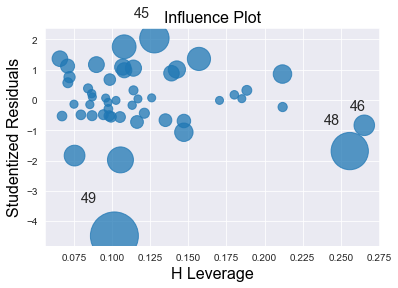

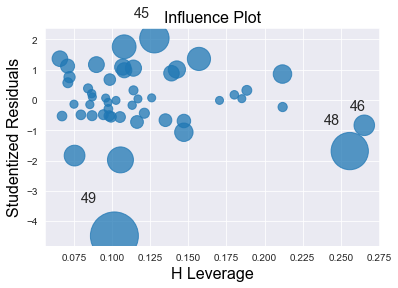

In [44]:
sm.graphics.influence_plot(model)

In [45]:
model.fittedvalues # y-Hat values

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133818
5     163473.807120
6     158099.292788
7     160155.644650
8     151634.743327
9     154829.662528
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301169
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236604
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


In [46]:
# Residual plot of homoscedasticity
def standarized_value(val):
    return(val-val.mean())/val.std()

<function matplotlib.pyplot.show(close=None, block=None)>

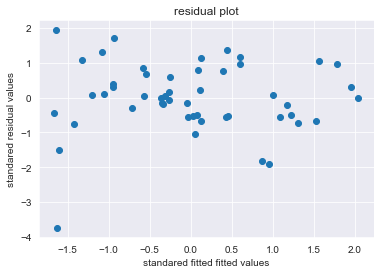

In [47]:
plt.scatter(standarized_value(model.fittedvalues),
           standarized_value(model.resid))
plt.title('residual plot')
plt.xlabel('standared fitted fitted values')
plt.ylabel('standared residual values')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

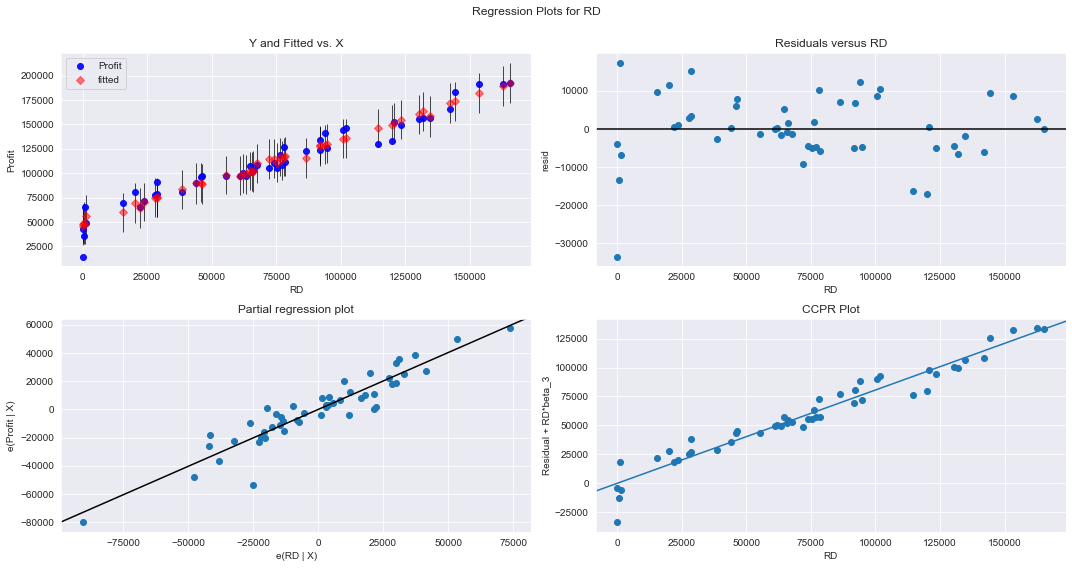

In [50]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show  # its partial regression plot and CCPR plot are in perfect slop

<function matplotlib.pyplot.show(close=None, block=None)>

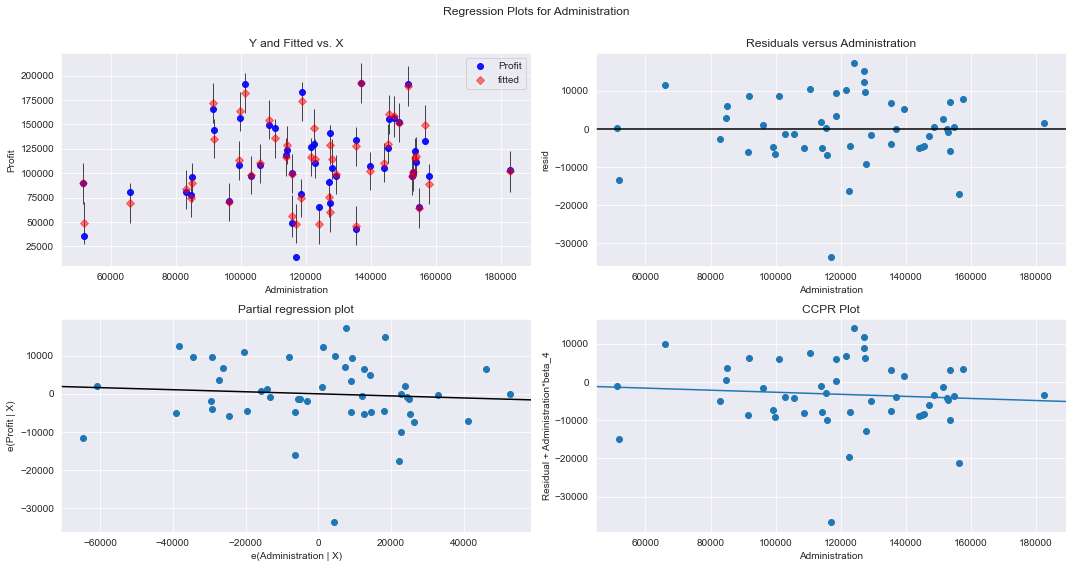

In [51]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

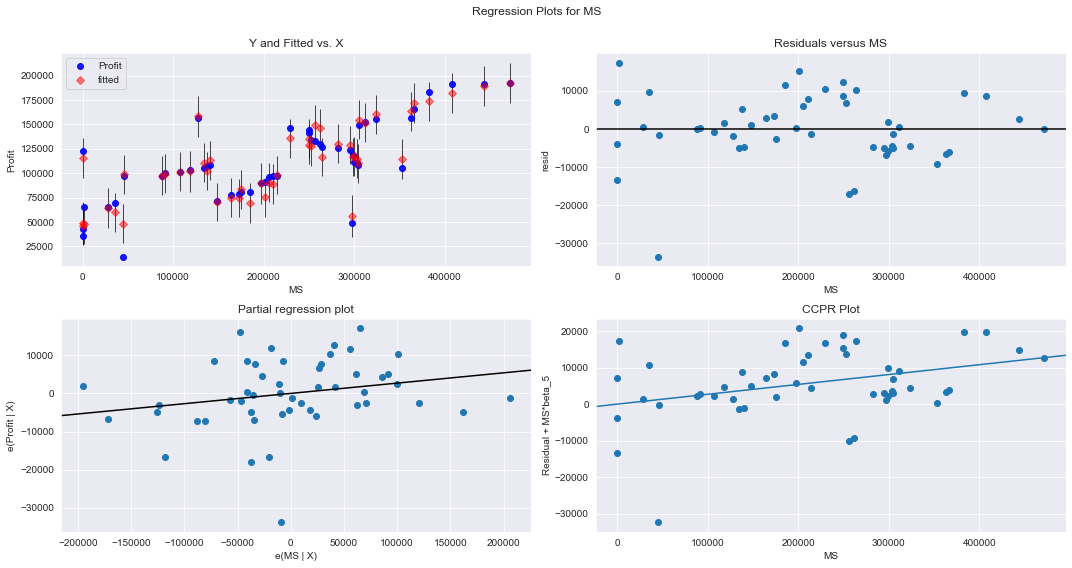

In [52]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show

In [53]:
#from here we can conclude that data is fitted and it has Rsquared >0.85 hence fitted
# we can prepare final model
final_profit=smf.ols('Profit~RD+Administration+MS',data=data1).fit()

In [54]:
#preparing dictionary for new data
new_data=pd.DataFrame({'RD':100000,'Administration':122699,'MS':21276.24},index=[1])

In [55]:
new_data

,RD,Administration,MS
1,100000,122699,21276.24


In [56]:
final_profit.predict(new_data)

1    127982.716317
dtype: float64

In [57]:
final_profit.predict(data1)

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [58]:
pred_y=final_profit.predict(data1)

In [59]:
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [60]:
data1['rsquared']=(model.rsquared)

In [61]:
data1

,RD,Administration,MS,State,Profit,rsquared
0,165349.20,136897.80,471784.10,New York,192261.83,0.950752
1,162597.70,151377.59,443898.53,California,191792.06,0.950752
2,153441.51,101145.55,407934.54,Florida,191050.39,0.950752
3,144372.41,118671.85,383199.62,New York,182901.99,0.950752
4,142107.34,91391.77,366168.42,Florida,166187.94,0.950752
5,131876.90,99814.71,362861.36,New York,156991.12,0.950752
6,134615.46,147198.87,127716.82,California,156122.51,0.950752
7,130298.13,145530.06,323876.68,Florida,155752.60,0.950752
8,120542.52,148718.95,311613.29,New York,152211.77,0.950752
9,123334.88,108679.17,304981.62,California,149759.96,0.950752
